In [205]:
import sklearn 
from sklearn.datasets import make_circles

n_samples = 1000

x, y = make_circles(
    n_samples=n_samples,
    noise=0.03,
    random_state=42
)

In [206]:
import torch
from torch import nn
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.cuda.is_available()
torch.manual_seed(42)
torch.cuda.manual_seed(42)


In [207]:
from sklearn.model_selection import train_test_split

xtrain, xtest , ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

xtrain = torch.tensor(xtrain, dtype=torch.float32).to(device)
xtest = torch.tensor(xtest, dtype=torch.float32).to(device)

ytrain = torch.tensor(ytrain, dtype= torch.float32).to(device)
ytest = torch.tensor(ytest, dtype= torch.float32).to(device)


## Model


In [208]:
class first_nn(nn.Module):
    def __init__(self):
        super().__init__()
        
        #* create input layer
        self.layer1 = nn.Linear(in_features=2, out_features=125)
        self.relu1 = nn.ReLU()
        
        self.layer2 = nn.Linear(in_features=125, out_features=250)
        self.relu2 = nn.ReLU()
        
        self.layer3 = nn.Linear(in_features=250, out_features=125)
        self.relu3 = nn.ReLU()
        
        self.layer4 = nn.Linear(in_features=125, out_features=1)
        self.relu4 = nn.ReLU()
        
        
        #* you can use nn.sequential for sequnetial models
        # self.two_linear_layers = nn.Sequential(
        #     nn.Linear(in_features=2, out_features=5),
        #     nn.Linear(in_features=5, out_features=1))

    def forward(self, x):
        #return two_linear_layers(x)
        l1 = self.layer1(x)
        r1 = self.relu1(l1)
        
        l2 = self.layer2(r1)
        r2 = self.relu2(l2)
        
        l3 = self.layer3(r2)
        r3 = self.relu3(l3)
        
        l4 = self.layer4(r3)
        r4 = self.relu4(l4)
        return r4

In [209]:
device = 'cuda'
model = first_nn().to(device)
loss_fn = nn.BCEWithLogitsLoss() #* sigmoid activation function built in 
opt = torch.optim.SGD(params=model.parameters(),
                      lr = 0.03)

In [210]:
## accuracy function
def accuracy_fn(y_true, y_pred):
    #* torch.eq => comparison between tensor, returns boolean
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = correct/(len(y_pred))*100
    return acc

In [211]:
epochs = 2501
train_acc_hist = []
test_acc_hist = []
train_loss_hist = []
test_lost_hist = []
epoch_hist = []

for epoch in range(epochs):
    ##training
    model.train()
    
    #*1. forward pass
    #* predict -> squeeze -> sigmoid -> round
    y_logits = model(xtrain).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) 
    
    #*2 calculate loss / acc 
    loss = loss_fn(y_logits, ytrain) 
    acc = accuracy_fn(y_true= ytrain, y_pred=y_pred)
    
    #*3 optimizer 0 grad
    opt.zero_grad()
    
    #*4 backword porp
    loss.backward()
    
    #* optimer step
    opt.step()
    
    ## testing
    model.eval()
    with torch.inference_mode():
        y_logits = model(xtest).squeeze()
        y_pred = torch.round(torch.sigmoid(y_logits))
        
        test_loss = loss_fn(y_logits, ytest)
        test_acc = accuracy_fn(y_true=ytest, y_pred=y_pred)
        
        if epoch % 100 ==0 :
            print(f"Epoch {epoch} \ntrain =>  | Accuracy : {acc:.2f}% | loss : {loss:.5f}")
            print(f"test =>  | Accuracy : {test_acc:.2f}% | loss : {test_loss:.5f} \n")
            train_acc_hist.append(acc)
            train_loss_hist.append(loss)
            test_acc_hist.append(test_acc)
            test_lost_hist.append(test_loss)
            epoch_hist.append(epoch)


Epoch 0 
train =>  | Accuracy : 56.25% | loss : 0.69120
test =>  | Accuracy : 51.00% | loss : 0.69140 

Epoch 100 
train =>  | Accuracy : 53.12% | loss : 0.68796
test =>  | Accuracy : 51.50% | loss : 0.68883 

Epoch 200 
train =>  | Accuracy : 53.62% | loss : 0.68502
test =>  | Accuracy : 52.00% | loss : 0.68648 

Epoch 300 
train =>  | Accuracy : 54.12% | loss : 0.68151
test =>  | Accuracy : 52.00% | loss : 0.68360 

Epoch 400 
train =>  | Accuracy : 55.00% | loss : 0.67695
test =>  | Accuracy : 53.00% | loss : 0.67983 

Epoch 500 
train =>  | Accuracy : 56.25% | loss : 0.67078
test =>  | Accuracy : 54.00% | loss : 0.67459 

Epoch 600 
train =>  | Accuracy : 57.25% | loss : 0.66204
test =>  | Accuracy : 54.00% | loss : 0.66707 

Epoch 700 
train =>  | Accuracy : 59.13% | loss : 0.64901
test =>  | Accuracy : 55.00% | loss : 0.65573 

Epoch 800 
train =>  | Accuracy : 61.88% | loss : 0.62934
test =>  | Accuracy : 57.00% | loss : 0.63831 

Epoch 900 
train =>  | Accuracy : 65.75% | loss 

In [212]:
from functions import *
#plt.style.available
plt.style.use('seaborn-v0_8-dark',)

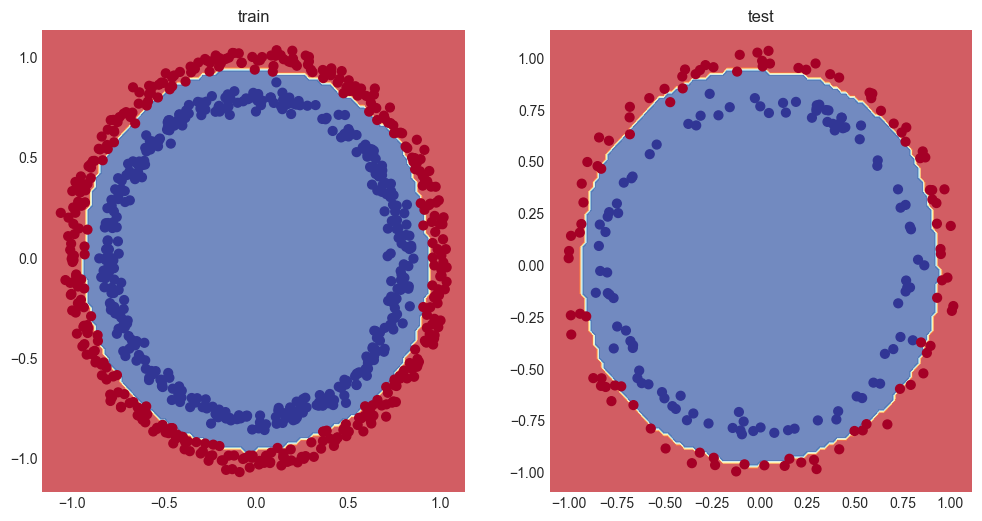

In [213]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model, xtrain, ytrain)

plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model, xtest, ytest)

In [214]:
#plt.style.available

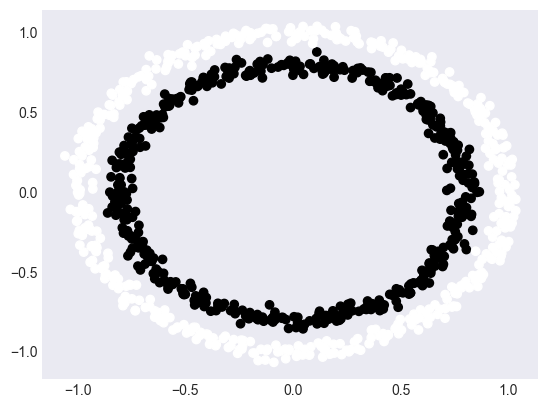

In [224]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-colorblind',)

x, y = make_circles( n_samples= 1000,
                    noise= 0.03,
                    random_state=42)


plt.scatter(x[:,0], x[:,1], c = y)

In [253]:
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'

xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.8, random_state=42)

xtrain = torch.tensor(xtrain, dtype=torch.float32).to(device)
xtest = torch.tensor(xtest, dtype=torch.float32).to(device)
ytrain = torch.tensor(ytrain, dtype=torch.float32).to(device)
ytest = torch.tensor(ytest, dtype=torch.float32).to(device)

In [254]:
class Non_linear_model(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        
        self.layer1 = nn.Linear(2,125)
        self.layer2 = nn.Linear(125,250)
        self.layer3 = nn.Linear(250,125)
        self.layer4 = nn.Linear(125,1)
        self.relu = nn.ReLU()
        
    def forward(self, x:torch.tensor):
        l1 = self.layer1(x)
        r1 = self.relu(l1)
        
        l2 = self.layer2(r1)
        r2 = self.relu(l2)
        
        l3 = self.layer3(r2)
        r3 = self.relu(l3)
        
        l4 = self.layer4(r3)
        r4 = self.relu(l4)

        return r4


In [262]:
model = Non_linear_model().to(device)


In [263]:
Bce_loss = nn.BCELoss()
Bce_wLogits_loss = nn.BCEWithLogitsLoss()
sig = nn.Sigmoid()
opt = torch.optim.SGD(params=model.parameters(),
                      lr = 0.05)

In [264]:
epochs = 1501

for epoch in range(epochs):
    model.train()
    
    logits = model(xtrain).squeeze()
    #loss = Bce_loss(torch.sigmoid(logits), ytrain)
    loss = Bce_wLogits_loss(logits, ytrain)
    
    y_pred = torch.round(torch.sigmoid(logits))
    acc = accuracy_fn(y_pred=y_pred, y_true=ytrain)
    
    opt.zero_grad()
    
    loss.backward()
    
    opt.step()
    
    #print(loss, acc)
    model.eval()
    with torch.inference_mode():
        logits = model(xtest).squeeze()
        #loss_test = Bce_loss(torch.sigmoid(logits), ytest)
        loss_test = Bce_wLogits_loss(logits, ytest)
        
        y_pred = torch.round(torch.sigmoid(logits))
        acc_test = accuracy_fn(y_pred=y_pred, y_true=ytest)
        
        
        if epoch % 100 == 0 :
            print(f"""Epoch {epoch}
Training: loss = {loss:.5f} | accuracy = {acc:.2f}
testing: loss = {loss_test:.5f} | accuracy = {acc_test:.2f} \n """)


Epoch 0
Training: loss = 0.69432 | accuracy = 50.00
testing: loss = 0.69469 | accuracy = 50.00 
 
Epoch 100
Training: loss = 0.68801 | accuracy = 52.50
testing: loss = 0.68916 | accuracy = 51.50 
 
Epoch 200
Training: loss = 0.68226 | accuracy = 54.12
testing: loss = 0.68412 | accuracy = 53.00 
 
Epoch 300
Training: loss = 0.67266 | accuracy = 55.75
testing: loss = 0.67561 | accuracy = 52.50 
 
Epoch 400
Training: loss = 0.65413 | accuracy = 58.25
testing: loss = 0.65907 | accuracy = 55.50 
 
Epoch 500
Training: loss = 0.61460 | accuracy = 62.38
testing: loss = 0.62369 | accuracy = 58.00 
 
Epoch 600
Training: loss = 0.56289 | accuracy = 95.75
testing: loss = 0.58712 | accuracy = 50.50 
 
Epoch 700
Training: loss = 0.52195 | accuracy = 99.75
testing: loss = 0.52613 | accuracy = 57.50 
 
Epoch 800
Training: loss = 0.45711 | accuracy = 100.00
testing: loss = 0.47262 | accuracy = 68.50 
 
Epoch 900
Training: loss = 0.39038 | accuracy = 95.50
testing: loss = 0.41350 | accuracy = 82.50 
 
E